In [53]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [54]:
df = pd.read_csv('bank.csv')

In [60]:
df = pd.get_dummies(df)

In [61]:
df

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes
0,59,2343,5,1042,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
1,56,45,5,1467,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,55,2476,5,579,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,54,184,5,673,2,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
11158,39,733,16,83,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
11160,43,0,8,9,2,172,5,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [62]:
df_x = df.drop(['deposit_no'],axis=1)

In [63]:
df_x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
1,56,45,5,1467,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,54,184,5,673,2,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
11158,39,733,16,83,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11160,43,0,8,9,2,172,5,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [64]:
df_y = df['deposit_yes']

In [65]:
df_y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit_yes, Length: 11162, dtype: uint8

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [67]:
reg = linear_model.LogisticRegression()

In [68]:
reg.fit(x_train, y_train)

C:\Users\zhass\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_pred = reg.predict(x_test)

In [70]:
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(y_test, y_pred)

array([[1798,  119],
       [  64, 1703]], dtype=int64)

In [89]:
y_test.sample(9)

4110     1
5169     1
9388     0
2392     1
4900     1
10759    0
10948    0
2072     1
2055     1
Name: deposit_yes, dtype: uint8

In [74]:
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [98]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

cm = np.zeros((len(y_test), len(y_pred)))
for x, y in zip(y_test, y_pred):
    cm[x][y] += 1

In [99]:
cm

array([[1798.,  119.,    0., ...,    0.,    0.,    0.],
       [  64., 1703.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9503257328990228

In [104]:
accuracy = (y_test == y_pred).sum() / float(len(y_test))
accuracy

0.9503257328990228

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1917
           1       0.93      0.96      0.95      1767

    accuracy                           0.95      3684
   macro avg       0.95      0.95      0.95      3684
weighted avg       0.95      0.95      0.95      3684



In [107]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

In [116]:
precision

array([0.47964169, 0.93468716, 1.        ])

In [117]:
recall

array([1.        , 0.96378042, 0.        ])

In [112]:
prec = cm[0][0]/(cm[0][0] + cm[0][1])

In [113]:
prec

0.9379238393322901

In [118]:
rec = cm[0][0]/(cm[0][0] + cm[1][0])

In [119]:
rec

0.9656283566058003

C:\Users\zhass\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.


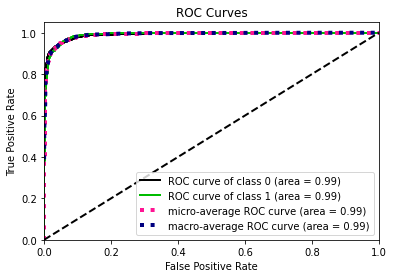

In [139]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_probas = reg.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

LogisticRegression: ROC AUC=0.990


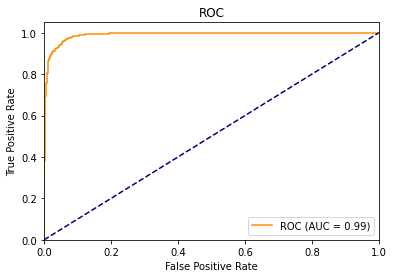

In [142]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

y_probas = reg.predict_proba(x_test)
y_probas = y_probas[:, 1]

lr_auc = roc_auc_score(y_test, y_probas)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))

fpr, tpr, treshold = roc_curve(y_test, y_probas)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [123]:
tp = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[1][1]
my_fpr = fp / (fp + tn)
my_tpr = tp / (tp + fn)

In [124]:
my_auc = 1/2 - my_fpr/2 + my_tpr/2

In [125]:
my_auc

0.9501577567880812